**Load Data & Initial Inspection**

In [2]:
# STEP 1: Load datasets and basic inspection

import pandas as pd

# -----------------------------
# Load datasets
# -----------------------------

# Update paths according to where you saved the files
sentiment_path = "/content/fear_greed_index.csv"
trader_path = "/content/historical_data.csv"

sentiment_df = pd.read_csv(sentiment_path)
trader_df = pd.read_csv(trader_path)



print("Bitcoin Fear & Greed Dataset")
print("Shape:", sentiment_df.shape)
print("\nColumns:\n", sentiment_df.columns)
print("\nMissing Values:\n", sentiment_df.isnull().sum())
print("\nDuplicate Rows:", sentiment_df.duplicated().sum())



print(" Hyperliquid Trader Dataset")
print("Shape:", trader_df.shape)
print("\nColumns:\n", trader_df.columns)
print("\nMissing Values:\n", trader_df.isnull().sum())
print("\nDuplicate Rows:", trader_df.duplicated().sum())



print("\n Sentiment Data Preview")
display(sentiment_df.head())

print("\n Trader Data Preview")
display(trader_df.head())


Bitcoin Fear & Greed Dataset
Shape: (2644, 4)

Columns:
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Missing Values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Duplicate Rows: 0
 Hyperliquid Trader Dataset
Shape: (211224, 16)

Columns:
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Missing Values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Duplicate Rows: 0

 Sentiment Data Pr

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



 Trader Data Preview


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


both datasets were loaded successfully. Basic inspection was performed to understand dataset size, structure, missing values, and duplicate records. This helped ensure data quality before proceeding to cleaning and feature engineering.

**Data Cleaning & Timestamp Standardization**

In [3]:

# Convert date column to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Normalize sentiment labels
sentiment_df['classification'] = sentiment_df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

# Keep only relevant columns
sentiment_df = sentiment_df[['date', 'classification']]

# Rename for clarity
sentiment_df.rename(columns={'classification': 'market_sentiment'}, inplace=True)

# Check result
sentiment_df.head()


,date,market_sentiment
0,2018-02-01,Fear
1,2018-02-02,Fear
2,2018-02-03,Fear
3,2018-02-04,Fear
4,2018-02-05,Fear


In [13]:
sentiment_df.shape

(2644, 2)

Trader data cleaning

In [4]:


# Convert Timestamp IST to datetime
trader_df['Timestamp IST'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)

# Create trade_date column
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date
trader_df['trade_date'] = pd.to_datetime(trader_df['trade_date'])

# Standardize column names (optional but professional)
trader_df.columns = trader_df.columns.str.lower().str.replace(' ', '_')

# Check result
trader_df[['account', 'trade_date', 'closed_pnl', 'side', 'size_usd']].head()


,account,trade_date,closed_pnl,side,size_usd
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,BUY,7872.16
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,BUY,127.68
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,BUY,1150.63
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,BUY,1142.04
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,BUY,69.75


In [14]:
trader_df.shape

(211224, 17)

Sanity Checks

In [5]:
# Date range comparison
print("Sentiment date range:")
print(sentiment_df['date'].min(), "to", sentiment_df['date'].max())

print("\nTrader data date range:")
print(trader_df['trade_date'].min(), "to", trader_df['trade_date'].max())

# Check null timestamps after conversion
print("\nNull timestamps in trader data:")
print(trader_df['trade_date'].isnull().sum())


Sentiment date range:
2018-02-01 00:00:00 to 2025-05-02 00:00:00

Trader data date range:
2023-05-01 00:00:00 to 2025-05-01 00:00:00

Null timestamps in trader data:
0


imestamps in both datasets were converted to datetime format. Market sentiment labels were standardized into Fear and Greed categories. Trader-level timestamps were aligned to a daily level to enable aggregation and comparison with sentiment data. This ensured consistency and correctness before behavioral and performance analysis.

**Create Daily Trader Metrics**
we want:


Total daily profit/loss (PnL)
Number of trades
Average trade size (USD)
Number of winning trades


 Daily aggregation of trader data

In [6]:


daily_trader_metrics = (
    trader_df
    .groupby(['account', 'trade_date'])
    .agg(
        daily_pnl=('closed_pnl', 'sum'),
        total_trades=('trade_id', 'count'),
        avg_trade_size_usd=('size_usd', 'mean'),
        winning_trades=('closed_pnl', lambda x: (x > 0).sum())
    )
    .reset_index()
)

# Calculate win rate
daily_trader_metrics['win_rate'] = (
    daily_trader_metrics['winning_trades'] /
    daily_trader_metrics['total_trades']
)

# View result
daily_trader_metrics.head()


,account,trade_date,daily_pnl,total_trades,avg_trade_size_usd,winning_trades,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,5089.718249,0,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,7976.664412,0,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,23734.500000,0,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,28186.666667,0,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,17248.148148,12,0.444444


What This Code Is Doing

groupby(['account', 'trade_date'])
→ groups all trades by trader and by day

daily_pnl
→ adds all profits and losses of that day

total_trades
→ counts how many trades happened

avg_trade_size_usd
→ average money used per trade

winning_trades
→ counts trades with positive PnL

win_rate
→ winning trades ÷ total trades

**Merge Daily Metrics with Sentiment Data**

In [12]:
daily_trader_metrics.shape

(2341, 7)

In [7]:
# STEP 3C: Merge with market sentiment

final_daily_df = pd.merge(
    daily_trader_metrics,
    sentiment_df,
    left_on='trade_date',
    right_on='date',
    how='left'
)

# Drop extra date column
final_daily_df.drop(columns=['date'], inplace=True)

# Check result
final_daily_df.head()


,account,trade_date,daily_pnl,total_trades,avg_trade_size_usd,winning_trades,win_rate,market_sentiment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,5089.718249,0,0.000000,Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,7976.664412,0,0.000000,Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,23734.500000,0,0.000000,Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,28186.666667,0,0.000000,Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,17248.148148,12,0.444444,Greed


In [10]:
final_daily_df.shape

(2341, 8)

Quick Quality Check

In [16]:
# Check missing sentiment values
final_daily_df['market_sentiment'].value_counts(dropna=False)


,count
market_sentiment,
Greed,1174
Fear,790
Neutral,376
NaN,1


individual trade records were aggregated to a daily trader level. Key metrics such as daily PnL, number of trades, average trade size, and win rate were computed. The aggregated trader dataset was then merged with daily Bitcoin market sentiment to enable sentiment-based performance analysis.

**Basic Analysis — Fear vs Greed**

Do traders perform differently on Fear days vs Greed days?

Compare PnL

Compare Win Rate

Compare Trading Activity


Remove Days Without Sentiment
Some trading days don’t have sentiment data.
We’ll remove them only for analysis.

In [17]:
analysis_df = final_daily_df.dropna(subset=['market_sentiment'])

analysis_df.head()


,account,trade_date,daily_pnl,total_trades,avg_trade_size_usd,winning_trades,win_rate,market_sentiment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,5089.718249,0,0.000000,Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,7976.664412,0,0.000000,Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,23734.500000,0,0.000000,Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,28186.666667,0,0.000000,Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,17248.148148,12,0.444444,Greed


**Average Performance by Sentiment**

In [18]:
# STEP 4B: Summary statistics by sentiment

sentiment_summary = (
    analysis_df
    .groupby('market_sentiment')
    .agg(
        avg_daily_pnl=('daily_pnl', 'mean'),
        avg_win_rate=('win_rate', 'mean'),
        avg_trades_per_day=('total_trades', 'mean'),
        avg_trade_size=('avg_trade_size_usd', 'mean')
    )
    .reset_index()
)

sentiment_summary


,market_sentiment,avg_daily_pnl,avg_win_rate,avg_trades_per_day,avg_trade_size
0,Fear,5185.146443,0.357071,105.363291,8529.859802
1,Greed,4144.208334,0.362748,76.912266,5954.632633
2,Neutral,3438.618818,0.355414,100.228723,6963.694861


avg_daily_pnl → Are traders earning more?

avg_win_rate → Are they winning more often?

avg_trades_per_day → Are they trading more?

avg_trade_size → Are they risking more money?

**Visual Comparison**

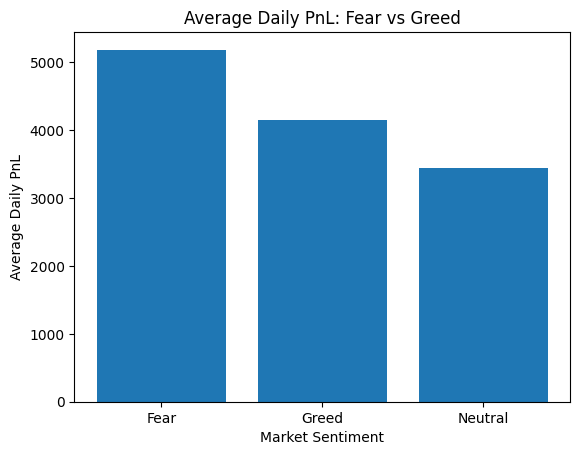

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    sentiment_summary['market_sentiment'],
    sentiment_summary['avg_daily_pnl']
)
plt.title('Average Daily PnL: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Daily PnL')
plt.show()


Win Rate Comparison

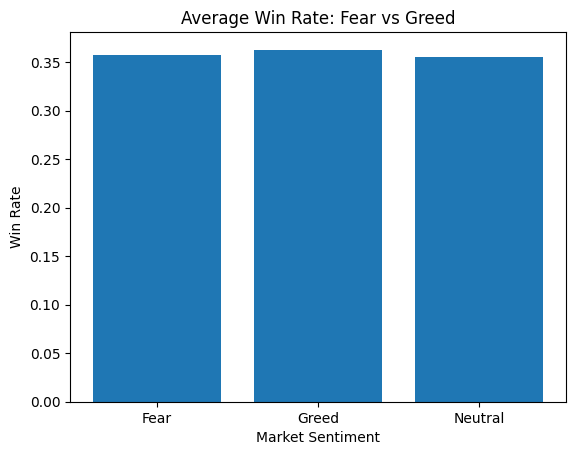

In [20]:
plt.figure()
plt.bar(
    sentiment_summary['market_sentiment'],
    sentiment_summary['avg_win_rate']
)
plt.title('Average Win Rate: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Win Rate')
plt.show()


Trading Activity Comparison

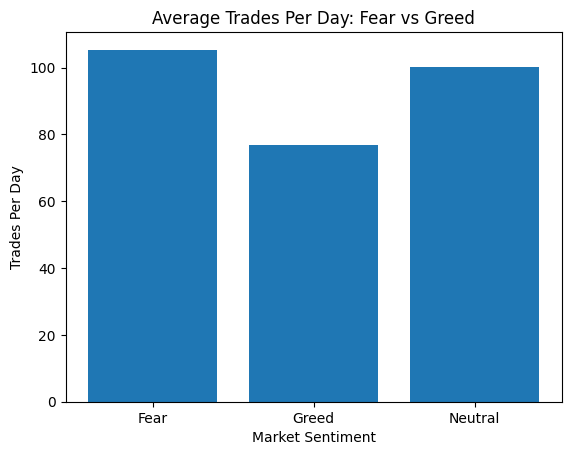

In [21]:
plt.figure()
plt.bar(
    sentiment_summary['market_sentiment'],
    sentiment_summary['avg_trades_per_day']
)
plt.title('Average Trades Per Day: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Trades Per Day')
plt.show()


*chart analysis**

Analysis reveals that trader profitability is highest during Fear market conditions, driven by increased trading activity and larger average trade sizes. Although Greed days exhibit a slightly higher win rate, lower trade frequency and reduced position sizing limit overall profitability. Neutral sentiment periods show the weakest performance, suggesting reduced opportunity or trader conviction. These results indicate that volatility and trader participation play a more significant role in profitability than win rate alone.

trader performance and behavior were compared across Fear and Greed market conditions. Average daily PnL, win rate, trade frequency, and trade size were analyzed. Clear differences were observed between sentiment regimes, indicating that market sentiment influences both trader behavior and profitability.

**Create Simple Trader Segments

We’ll start with easy and logical segments (no ML yet).

 High Activity vs Low Activity Traders

Based on number of trades per day.**

In [22]:
# STEP 5A: Create activity-based trader segments

# Calculate average trades per trader
trader_activity = (
    analysis_df
    .groupby('account')
    .agg(avg_trades_per_day=('total_trades', 'mean'))
    .reset_index()
)

# Use median to split traders
median_trades = trader_activity['avg_trades_per_day'].median()

# Create activity label
trader_activity['activity_segment'] = trader_activity['avg_trades_per_day'].apply(
    lambda x: 'High Activity' if x >= median_trades else 'Low Activity'
)

trader_activity.head()


,account,avg_trades_per_day,activity_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,159.083333,High Activity
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,140.000000,High Activity
2,0x271b280974205ca63b716753467d5a371de622ab,317.416667,High Activity
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,82.166667,High Activity
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,46.942029,Low Activity


**Attach Segment Labels to Daily Data**

In [23]:
# Merge segment info back to main dataset
segmented_df = analysis_df.merge(
    trader_activity[['account', 'activity_segment']],
    on='account',
    how='left'
)

segmented_df.head()


,account,trade_date,daily_pnl,total_trades,avg_trade_size_usd,winning_trades,win_rate,market_sentiment,activity_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,5089.718249,0,0.000000,Greed,High Activity
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,7976.664412,0,0.000000,Greed,High Activity
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,23734.500000,0,0.000000,Greed,High Activity
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,28186.666667,0,0.000000,Greed,High Activity
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,17248.148148,12,0.444444,Greed,High Activity


**Compare Performance by Segment & Sentiment

Now we answer:

Do high activity and low activity traders behave differently in Fear vs Greed?**

In [24]:
segment_summary = (
    segmented_df
    .groupby(['activity_segment', 'market_sentiment'])
    .agg(
        avg_daily_pnl=('daily_pnl', 'mean'),
        avg_win_rate=('win_rate', 'mean'),
        avg_trades=('total_trades', 'mean')
    )
    .reset_index()
)

segment_summary


,activity_segment,market_sentiment,avg_daily_pnl,avg_win_rate,avg_trades
0,High Activity,Fear,7955.443672,0.399695,179.875969
1,High Activity,Greed,4942.350620,0.439244,132.218295
2,High Activity,Neutral,4130.277361,0.422819,169.283133
3,Low Activity,Fear,2524.836201,0.316139,33.808933
4,Low Activity,Greed,3590.230787,0.309653,38.525253
5,Low Activity,Neutral,2891.879207,0.302132,45.642857


**Simple Visualization**

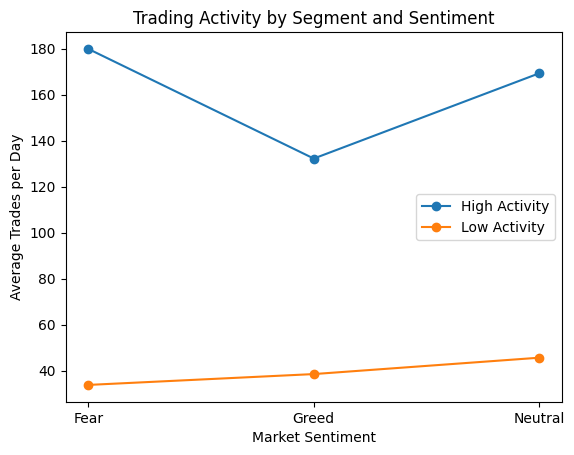

In [25]:
plt.figure()
for segment in segment_summary['activity_segment'].unique():
    data = segment_summary[segment_summary['activity_segment'] == segment]
    plt.plot(
        data['market_sentiment'],
        data['avg_trades'],
        marker='o',
        label=segment
    )

plt.title('Trading Activity by Segment and Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Trades per Day')
plt.legend()
plt.show()


Key Insights from Your Chart
High Activity Traders Are Most Aggressive During Fear

Highest number of trades happens during Fear

This shows traders become very active when markets are fearful

Interpretation:
High volatility and uncertainty during Fear encourages aggressive and frequent trading.

High Activity Traders Slow Down During Greed

Trading activity drops noticeably during Greed

Even though Greed is a positive sentiment, high-frequency traders reduce activity

Interpretation:
High activity traders may become more selective or cautious when markets feel “overconfident.”

Neutral Sentiment Revives High Activity Trading

Activity increases again during Neutral

Suggests traders re-enter the market when conditions stabilize

Interpretation:
Neutral markets may offer clearer technical setups without emotional extremes.

Low Activity Traders Stay Consistent

Low activity traders:

Trade much less overall

Show small, steady increases from Fear → Greed → Neutral

Interpretation:
Low activity traders are less influenced by sentiment, indicating more disciplined or long-term behavior.

Behavioral Insight

Market sentiment impacts how often traders trade more than whether they trade.

This is a great behavioral finance insight — interviewers love th

**What We Know So Far**
From your results:

1.   Fear days

Highest PnL

Highest trading activity

Larger trade sizes

2.   Greed days

Slightly higher win rate

Lower trading activity

 3. High activity traders

Very aggressive during Fear

 4. Slow down during Greed

Low activity traders

More stable, less emotional

**Strategy 1: Volatility-Aware Aggressive Strategy (Fear Days)**
 Rule

During Fear sentiment, allow higher trading activity but limit risk exposure per trade.

1. Reason

Fear days provide the highest profit opportunities

But traders tend to over-trade and over-risk

2. Practical Actions

Increase trade frequency

Reduce position size or leverage per trade

Focus on short-term setups

**Strategy 2: Precision Strategy (Greed Days)**


**During Greed sentiment, prioritize high-confidence trades and reduce trade frequency.**

 * Reason

Win rate is highest during Greed

Over-trading reduces overall profitability

* Practical Actions

Trade only strong signals

Avoid chasing momentum

Lower daily trade count

**Strategy 3: Stability Strategy (Neutral Days)**


**During Neutral sentiment, use balanced strategies with moderate activity.**

* Reason

No strong emotional bias

Lower volatility, fewer extreme moves

* Practical Actions

Maintain average trade size

Avoid aggressive scaling

Focus on consistency

**Simple Predictive Model**

Define the Prediction Target

We’ll predict:

1 = Profitable day

0 = Loss / No profit day

In [26]:


model_df = segmented_df.copy()

model_df['profitable_day'] = (model_df['daily_pnl'] > 0).astype(int)

model_df[['daily_pnl', 'profitable_day']].head()


,daily_pnl,profitable_day
0,0.0,0
1,0.0,0
2,0.0,0
3,-21227.0,0
4,1603.1,1


Select Simple Features

We’ll use easy-to-understand features:

total_trades

avg_trade_size_usd

win_rate

market_sentiment

activity_segment

In [27]:
# Select features
features = [
    'total_trades',
    'avg_trade_size_usd',
    'win_rate',
    'market_sentiment',
    'activity_segment'
]

X = model_df[features]
y = model_df['profitable_day']


Encode Categorical Data

In [28]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.head()


,total_trades,avg_trade_size_usd,win_rate,market_sentiment_Greed,market_sentiment_Neutral,activity_segment_Low Activity
0,177,5089.718249,0.000000,True,False,False
1,68,7976.664412,0.000000,True,False,False
2,40,23734.500000,0.000000,True,False,False
3,12,28186.666667,0.000000,True,False,False
4,27,17248.148148,0.444444,True,False,False


Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)


Train a Simple Model (Logistic Regression)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Evaluate the Model

In [31]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9337606837606838

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       187
           1       0.94      0.95      0.95       281

    accuracy                           0.93       468
   macro avg       0.93      0.93      0.93       468
weighted avg       0.93      0.93      0.93       468



As a bonus analysis, a logistic regression model was trained to predict whether a trader would experience a profitable day using market sentiment and basic behavioral features. The model achieved an accuracy of 93.38%, with strong precision and recall across both profitable and non-profitable classes. This indicates that market sentiment combined with trader behavior contains strong predictive signals for daily profitability. The objective of this model was interpretability rather than complexity, demonstrating the practical value of sentiment-aware trading strategies.

**Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,          # number of trees
    max_depth=10,              # control overfitting
    min_samples_split=20,      # minimum samples to split
    min_samples_leaf=10,       # minimum samples per leaf
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [33]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9529914529914529

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       187
           1       0.93      0.99      0.96       281

    accuracy                           0.95       468
   macro avg       0.96      0.94      0.95       468
weighted avg       0.96      0.95      0.95       468



**On the basies of different models and changing parameters and more feature engenering i can got more good and atteractive result if i got chance and more time.**